In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('../02_Daten/Simulation-Dichteprüfung/simulation-st5.csv', sep=';')

C:\Users\pauls\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,7,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Richtige Zeit für alle Einträge
df['date'] = [datetime.utcfromtimestamp(x/1000) for x in df['time']]

In [13]:
df.head()

,time,configuration_label,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,druck,handaktiv,identnummer,iomaster,leck,maintenance_label,maintenance_label_cleaning,messenaktiv,repair_label,rework_label,rework_label_assembly_error,status,date
0,1635112800000,NaN,False,False,False,5.362381,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:00
1,1635112801000,NaN,False,False,False,4.604942,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:01
2,1635112802000,NaN,False,False,False,6.139246,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:02
3,1635112803000,NaN,False,False,False,5.217539,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:03
4,1635112804000,NaN,False,False,False,4.224132,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:04


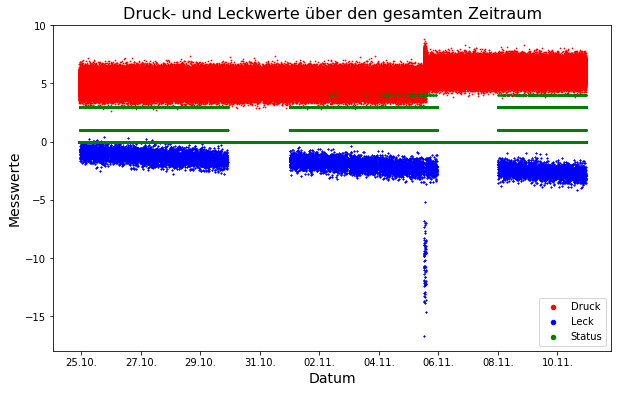

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.date, df.druck, color='red', label='Druck', s=0.5)
ax.scatter(df.date, df.leck, color='blue', label='Leck', s=0.5)
ax.scatter(df.date, df.status, color='green', label='Status', s=0.5)

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Druck- und Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

In [15]:
df[['druck','leck','status']]

,druck,leck,status
0,5.362381,0.0,0.0
1,4.604942,0.0,0.0
2,6.139246,0.0,0.0
3,5.217539,0.0,0.0
4,4.224132,0.0,0.0
...,...,...,...
1455419,5.547973,0.0,3.0
1455420,6.251326,0.0,3.0
1455421,5.337404,0.0,3.0
1455422,6.055028,0.0,3.0


In [14]:
X = df[['druck', 'leck']]
y = df['status']

In [7]:
X

,druck,leck
0,5.362381,0.0
1,4.604942,0.0
2,6.139246,0.0
3,5.217539,0.0
4,4.224132,0.0
...,...,...
1455419,5.547973,0.0
1455420,6.251326,0.0
1455421,5.337404,0.0
1455422,6.055028,0.0


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.5562530231740029

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
print("Correct classification rate:", mlp.score(X_test, y_test))

In [8]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Correct classification rate:", knn.score(X_test, y_test))

Correct classification rate: 0.52243744778154


Text(0.5, 1.0, 'Confusion matrix')

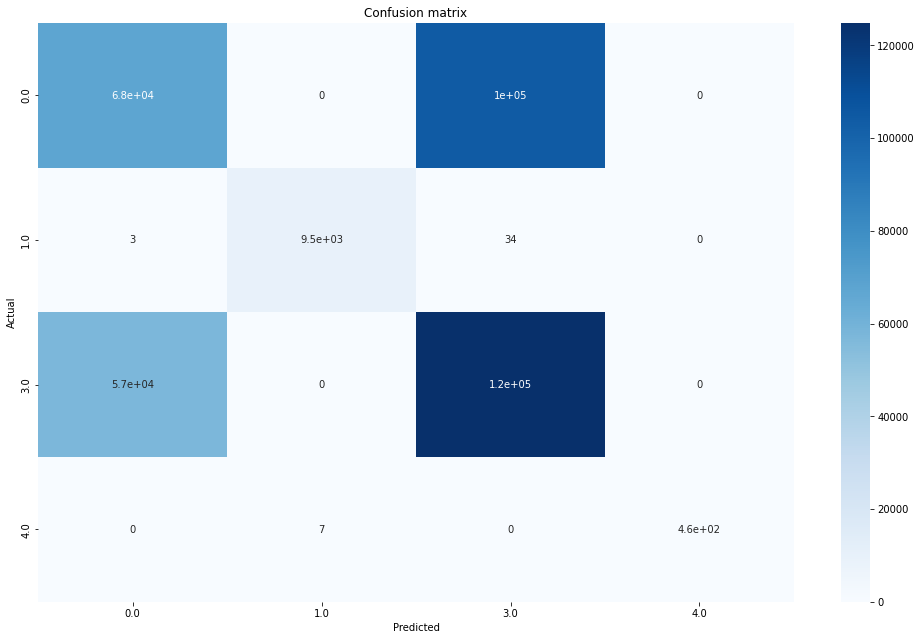

In [20]:
from sklearn.metrics import confusion_matrix

conf_df = df['status'].drop_duplicates().sort_values()
pipe_pred = pipe.predict(X_test)
conf_matrix = confusion_matrix(y_test, pipe_pred)
plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=0.180, bottom=0.280, right=1.0, top=0.950)
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=conf_df,
            yticklabels=conf_df,
            cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.title('Confusion matrix')

man sieht, dass die Klassifizierung vor allem bei Status 0 (Maschine im Leerlauf) und 3 (Bauteil in Maschine) schlecht ist.
Da diese Unterscheidung nicht wirklich interessant ist, kann diese Unterscheidung vernachlässigt werden.
Es wird im Folgenden nur zwischen Status 1 (Bauteil in Ordnung), 2 (Teil muss wegeschmissen werden (kommt in diesem DF nicht vor)) und 4 (Teil muss nachbearbeitet werden) unterschieden

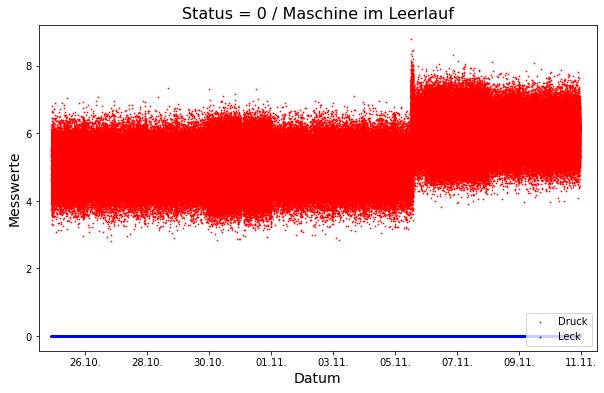

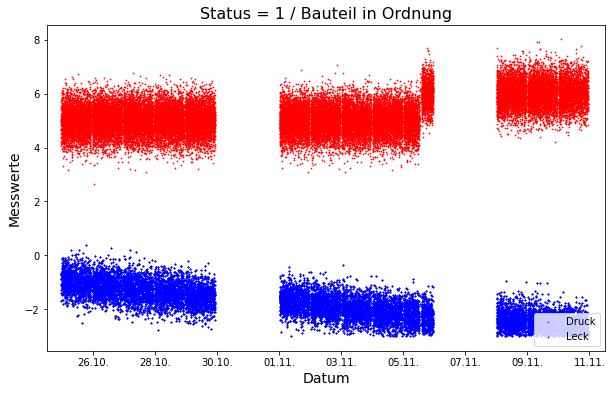

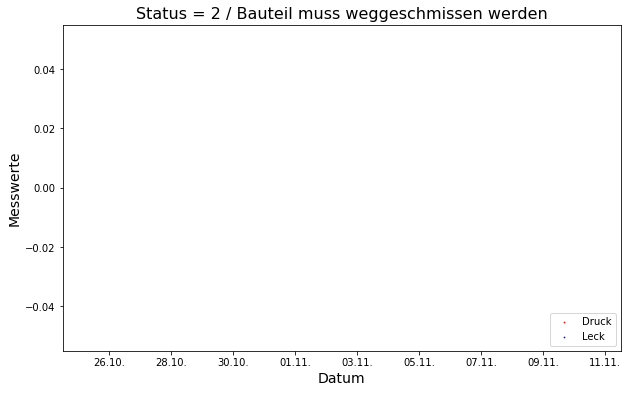

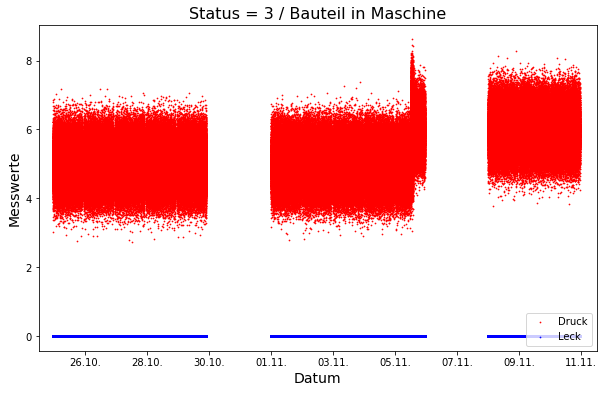

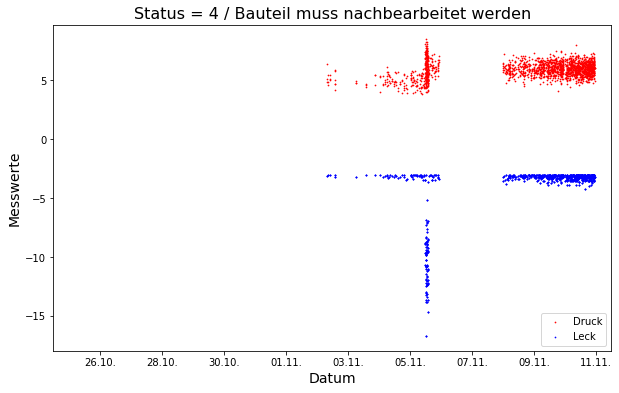

In [5]:
# was bedeuten Status 0 bis 4?
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

explanation = (" / Maschine im Leerlauf"," / Bauteil in Ordnung"," / Bauteil muss weggeschmissen werden"," / Bauteil in Maschine"," / Bauteil muss nachbearbeitet werden") 

for i in range(0,5):
    sample = df[df.status == i]
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(sample.date, sample.druck, color='red', label='Druck', s=0.5)
    ax.scatter(sample.date, sample.leck, color='blue', label='Leck', s=0.5)

    ax.set_xlim([datetime.datetime(2021, 10, 24, 12, 0, 0), datetime.datetime(2021, 11, 11, 12, 0, 0)])
    ax.set_title("Status = " + str(i) + explanation[i], fontsize=16)

    ax.set_xlabel("Datum", fontsize=14)
    ax.set_ylabel("Messwerte", fontsize=14)

    date_form = DateFormatter("%d.%m.")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
    plt.legend(loc=4)

### Ohne Status 0 und 3

In [4]:
df_reduced = df[(df.status != 3) & (df.status != 0)]

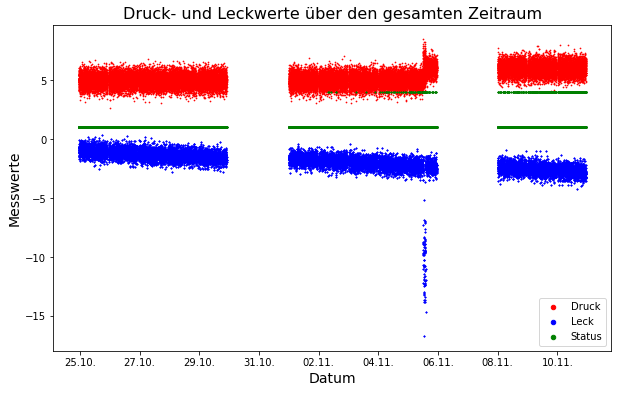

In [92]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_reduced.date, df_reduced.druck, color='red', label='Druck', s=0.5)
ax.scatter(df_reduced.date, df_reduced.leck, color='blue', label='Leck', s=0.5)
ax.scatter(df_reduced.date, df_reduced.status, color='green', label='Status', s=0.5)

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Druck- und Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

In [5]:
X_new = df_reduced[['druck', 'leck']]
y_new = df_reduced['status']

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test) 

0.9986044657097288

Text(0.5, 1.0, 'Confusion matrix')

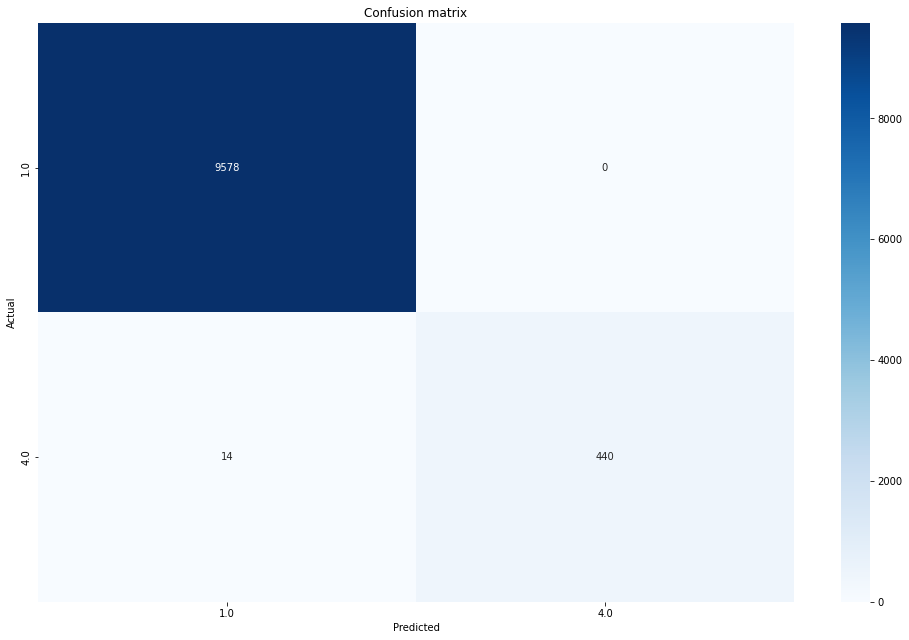

In [43]:
from sklearn.metrics import confusion_matrix

conf_df = df_reduced['status'].drop_duplicates().sort_values()
pipe_pred = pipe.predict(X_test)
conf_matrix = confusion_matrix(y_test, pipe_pred)
plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=0.180, bottom=0.280, right=1.0, top=0.950)
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=conf_df,
            yticklabels=conf_df,
            cmap="Blues",
            fmt='.4g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.title('Confusion matrix')

nur von dem Leckwert den Status vorhersagen

In [6]:
X_leck = df_reduced[['leck']]
y_leck = df_reduced['status']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_leck, y_leck, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test) 

0.9987041467304625

Text(0.5, 1.0, 'Confusion matrix')

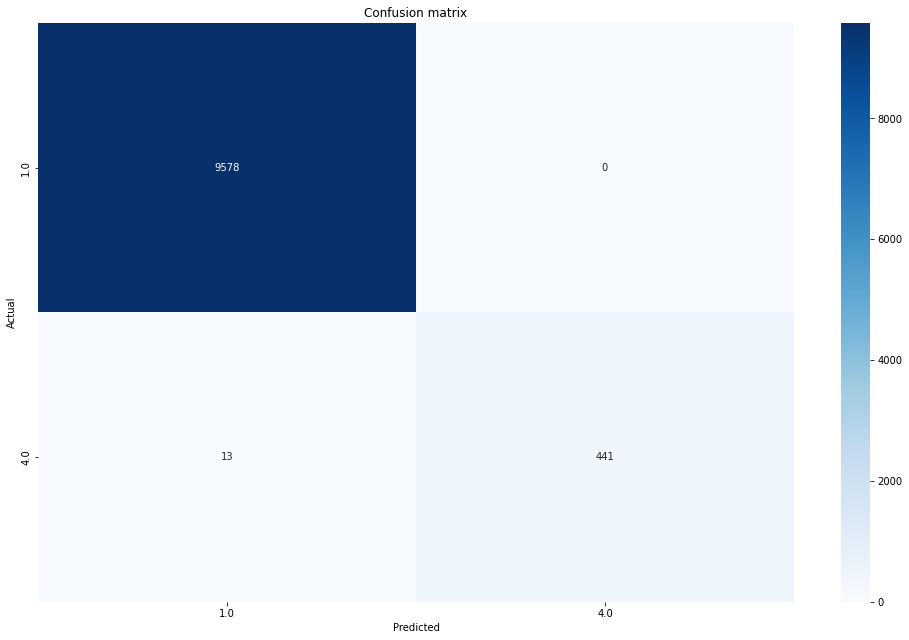

In [38]:
from sklearn.metrics import confusion_matrix

conf_df = df_reduced['status'].drop_duplicates().sort_values()
pipe_pred = pipe.predict(X_test)
conf_matrix = confusion_matrix(y_test, pipe_pred)
plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=0.180, bottom=0.280, right=1.0, top=0.950)
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=conf_df,
            yticklabels=conf_df,
            cmap="Blues",
            fmt='.4g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.title('Confusion matrix')

nur von dem Druck den Status vorhersagen

In [44]:
X_druck = df_reduced[['druck']]
y_druck = df_reduced['status']

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_druck, y_druck, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test) 

0.9547448165869219

Text(0.5, 1.0, 'Confusion matrix')

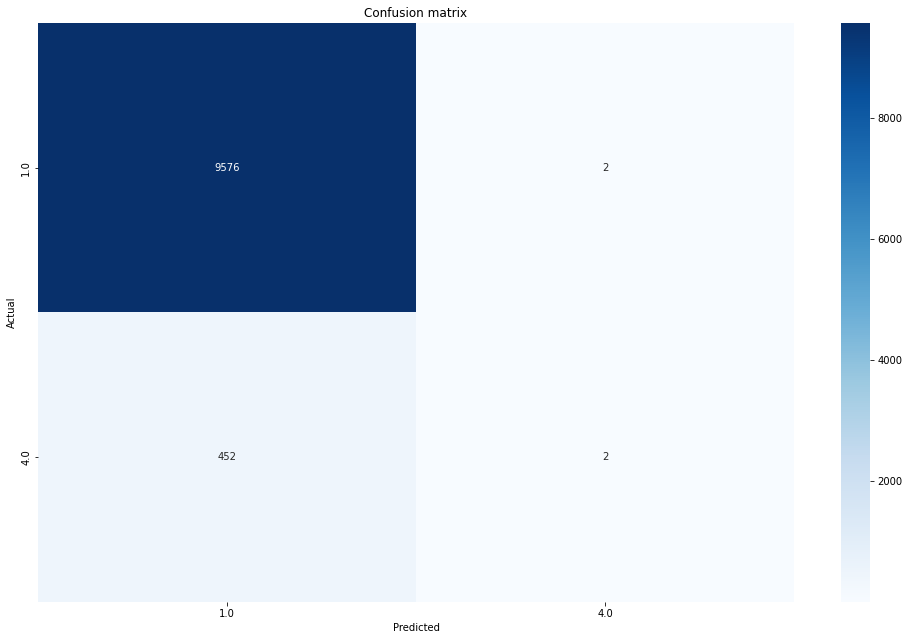

In [46]:
from sklearn.metrics import confusion_matrix

conf_df = df_reduced['status'].drop_duplicates().sort_values()
pipe_pred = pipe.predict(X_test)
conf_matrix = confusion_matrix(y_test, pipe_pred)
plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=0.180, bottom=0.280, right=1.0, top=0.950)
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=conf_df,
            yticklabels=conf_df,
            cmap="Blues",
            fmt='.4g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.title('Confusion matrix')

Text(0.5, 1.0, 'Confusion matrix')

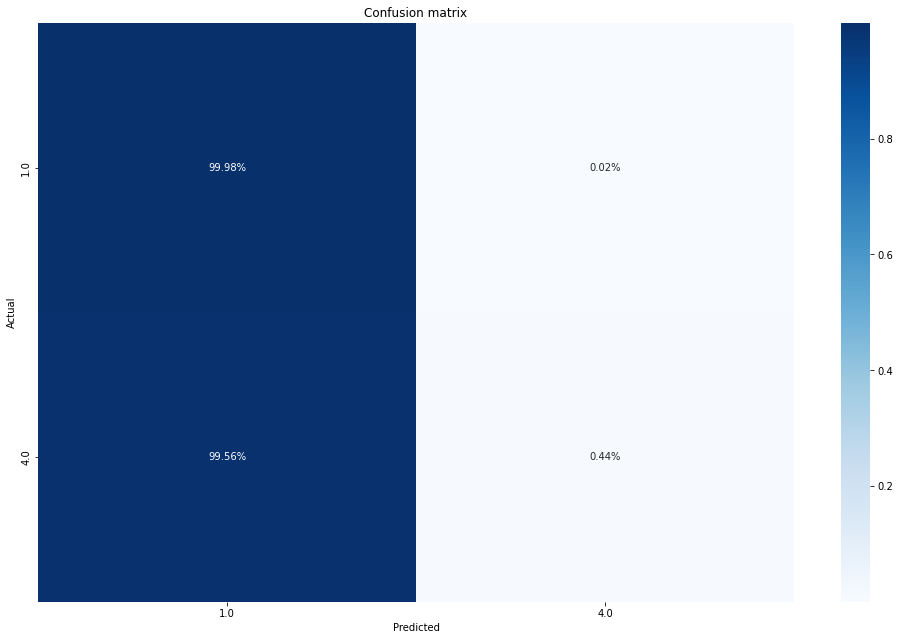

In [53]:
from sklearn.metrics import confusion_matrix

conf_df = df_reduced['status'].drop_duplicates().sort_values()
pipe_pred = pipe.predict(X_test)

# Normalisieren für Prozenangabe
conf_matrix = confusion_matrix(y_test, pipe_pred, normalize='true')

plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=0.180, bottom=0.280, right=1.0, top=0.950)
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=conf_df,
            yticklabels=conf_df,
            cmap="Blues",
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.title('Confusion matrix')

99.56% von Status 4 werden als Status 1 vorhergesagt -> nur der Druck-Wert ist nicht ausreichend, um den Status korrekt vorherzusagen

### Anomalie Erkennung mit Isolation Forest

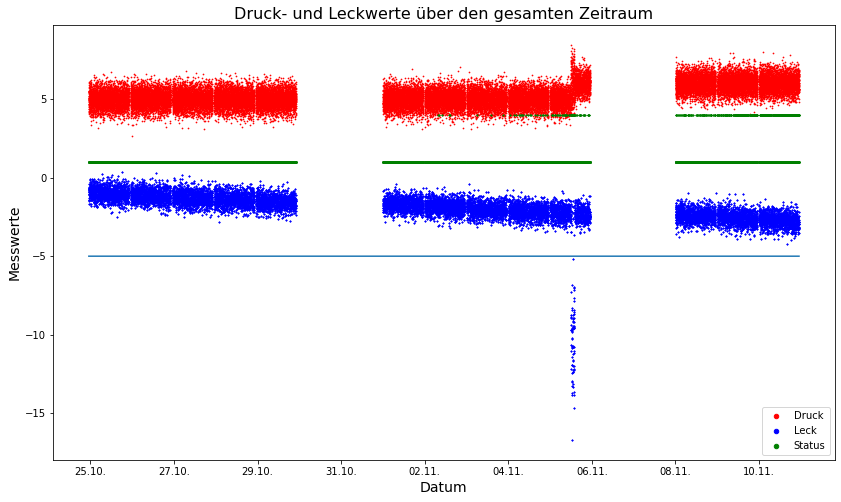

In [110]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(df_reduced.date, df_reduced.druck, color='red', label='Druck', s=0.5)
ax.scatter(df_reduced.date, df_reduced.leck, color='blue', label='Leck', s=0.5)
ax.scatter(df_reduced.date, df_reduced.status, color='green', label='Status', s=0.5)
ax.plot(df_reduced.date, np.repeat(-5, len(df_reduced)))

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Druck- und Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [16]:
# aus Gesamtgrafik oben geschaut, ab welchem Wert Ausreißer beginnen und dann Anteil von Gesamt-DF
outliers_fraction = len(df_reduced[df_reduced.leck < -5])/len(df_reduced)

In [17]:
# Leckwert skalieren
scaler = StandardScaler()
leck_scaled = scaler.fit_transform(df_reduced[['leck']])

In [18]:
model = IsolationForest(contamination=outliers_fraction)
model.fit(leck_scaled) 

IsolationForest(contamination=0.005681818181818182)

C:\Users\pauls\AppData\Local\Temp/ipykernel_10148/1396699855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['anomaly'] = model.predict(leck_scaled)


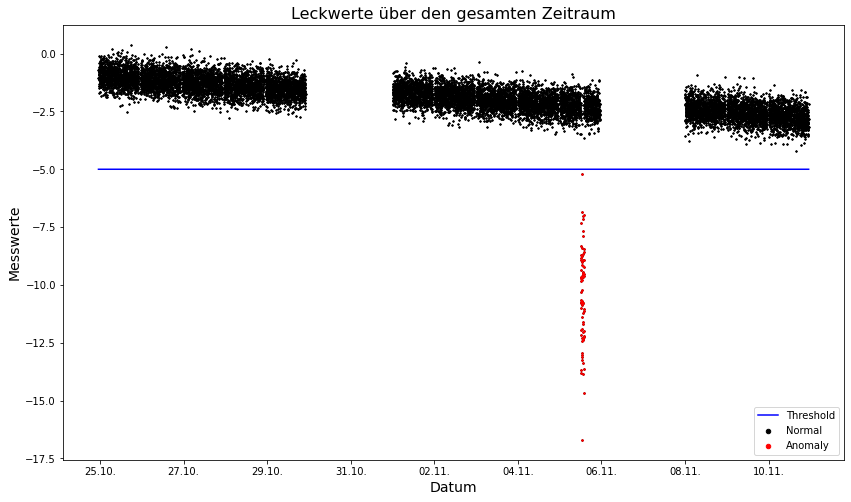

In [19]:
fig, ax = plt.subplots(figsize=(14,8))

df_reduced['anomaly'] = model.predict(leck_scaled)
a = df_reduced.loc[df_reduced['anomaly'] == -1] #anomaly
ax.scatter(df_reduced.date, df_reduced['leck'], color='black', label = 'Normal', s=1)
ax.scatter(a.date,a['leck'], color='red', label = 'Anomaly', s=1)

#ax.scatter(df_reduced.date, df_reduced.druck, color='red', label='Druck', s=0.5)
#ax.scatter(df_reduced.date, df_reduced.leck, color='blue', label='Leck', s=0.5)
#ax.scatter(df_reduced.date, df_reduced.status, color='green', label='Status', s=0.5)
ax.plot(df_reduced.date, np.repeat(-5, len(df_reduced)), color='blue', label='Threshold')

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

### Zeug fürs Frontend

Loop mit neuen Daten, die klassifiziert werden sollen -> "Echtzeitszenario"

In [8]:
X_new

,druck,leck
3798,5.537846,-1.064989
3799,4.403788,-1.064989
3800,5.180467,-1.064989
3874,5.020394,-0.712844
3875,4.640775,-0.712844
...,...,...
1455262,6.221109,-2.188998
1455263,6.562955,-2.188998
1455374,6.053512,-3.168525
1455375,4.982670,-3.168525


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, train_size=0.75)

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

print("Correct classification rate:", lgr.score(X_test, y_test))

Correct classification rate: 0.9988038277511961


In [10]:
X_long = pd.concat([X_new]*5, ignore_index=True)
y_long = pd.concat([y_new]*5, ignore_index=True)

In [11]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, train_size=0.75)

lgr = LogisticRegression(random_state=42)
lgr.fit(X_train, y_train)

right_class = 0
wrong_class = 0
i=0

X_long.reset_index(drop=True, inplace=True)
y_long.reset_index(drop=True, inplace=True)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for index, row in X_long.iterrows():
        row_scaled = scaler.transform([row])
        lgr.predict(row_scaled)

        if (lgr.predict(row_scaled) == y_long.iloc[index]):
            right_class += 1
        else:
            wrong_class += 1
        
        
        if (i % 1000 == 0):
            print("bisher richtig vorhersagte Einträge:", right_class)
            print("bisher falsch vorhersagte Einträge:", wrong_class)
            print(np.round(right_class/(right_class+wrong_class)*100, 2), "% richtig vorhergesagt")
            print('----------------------')
        
        i += 1

bisher richtig vorhersagte Einträge: 1
bisher falsch vorhersagte Einträge: 0
100.0 % richtig vorhergesagt
----------------------
bisher richtig vorhersagte Einträge: 1001
bisher falsch vorhersagte Einträge: 0
100.0 % richtig vorhergesagt
----------------------
bisher richtig vorhersagte Einträge: 2001
bisher falsch vorhersagte Einträge: 0
100.0 % richtig vorhergesagt
----------------------
bisher richtig vorhersagte Einträge: 3001
bisher falsch vorhersagte Einträge: 0
100.0 % richtig vorhergesagt
----------------------
bisher richtig vorhersagte Einträge: 4001
bisher falsch vorhersagte Einträge: 0
100.0 % richtig vorhergesagt
----------------------
bisher richtig vorhersagte Einträge: 5001
bisher falsch vorhersagte Einträge: 0
100.0 % richtig vorhergesagt
----------------------
bisher richtig vorhersagte Einträge: 6001
bisher falsch vorhersagte Einträge: 0
100.0 % richtig vorhergesagt
----------------------
bisher richtig vorhersagte Einträge: 7001
bisher falsch vorhersagte Einträge: 0

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    while True:
        try:
            druck_wert = float(input('Druck-Wert eingeben:'))
            leck_wert = float(input('Leck-Wert eingeben:'))
            if (druck_wert == 123 or leck_wert == 123):
                break

            vals_scaled = scaler.transform([[druck_wert, leck_wert]])
            pred = lgr.predict(vals_scaled).astype('int')
            print('Ihre Eingaben sind: \n Druckwert:', druck_wert, ' \n Leckwert:', leck_wert)
            print('Der vorhergesagte Status für dieses Bauteil ist:', pred[0])
            print('----------')

        except ValueError:
            print("Bitte eine Zahl eingeben")

Ihre Eingaben sind: 
 Druckwert: 6.0  
 Leckwert: -4.0
Der vorhergesagte Status für dieses Bauteil ist: 4
----------


### DF in viele Time Series schneiden

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [4]:
df = pd.read_csv('../../02_Daten/Simulation-Dichteprüfung/simulation-st5.csv', sep=';')

C:\Users\pauls\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,7,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# Richtige Zeit für alle Einträge
df['date'] = [datetime.utcfromtimestamp(x/1000) for x in df['time']]

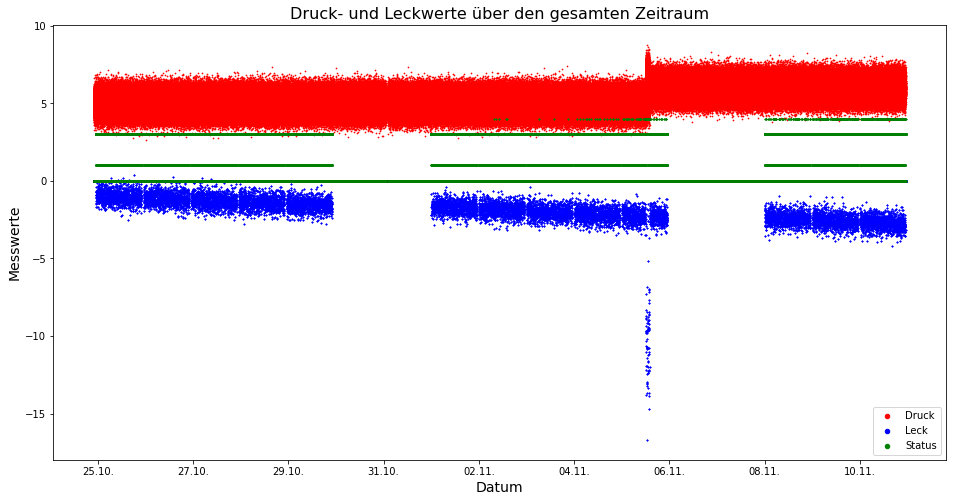

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df.date, df.druck, color='red', label='Druck', s=0.5)
ax.scatter(df.date, df.leck, color='blue', label='Leck', s=0.5)
ax.scatter(df.date, df.status, color='green', label='Status', s=0.5)

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Druck- und Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

Status 0 und 3 bleiben immer längere Zeit -> wie lange genau?
Status 1 und 4 bleiben 2 bis 3 Einträge / Sekunden

In [17]:
df[df.status == 3].head(100)

,time,configuration_label,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,druck,handaktiv,identnummer,iomaster,leck,maintenance_label,maintenance_label_cleaning,messenaktiv,repair_label,rework_label,rework_label_assembly_error,status,date
3741,1635116542000,NaN,False,False,False,5.724660,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:22
3742,1635116543000,NaN,False,False,False,5.053403,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:23
3743,1635116544000,NaN,False,False,False,4.817478,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:24
3744,1635116545000,NaN,False,False,False,4.976527,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:25
3745,1635116546000,NaN,False,False,False,4.619953,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,1635116667000,NaN,False,False,False,5.025518,False,08cdcbf3-2316-4689-83e0-988f60e56b20,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:04:27
3866,1635116668000,NaN,False,False,False,4.800116,False,08cdcbf3-2316-4689-83e0-988f60e56b20,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:04:28
3867,1635116669000,NaN,False,False,False,5.247517,False,08cdcbf3-2316-4689-83e0-988f60e56b20,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:04:29
3868,1635116670000,NaN,False,False,False,4.255787,False,08cdcbf3-2316-4689-83e0-988f60e56b20,False,0.0,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:04:30


In [6]:
time_series = []
# wenn es eine Änderung des Status gibt, wird der Index an dieser Stelle abgespeichert
ind_changes = df[df["status"].shift() != df["status"]].index.tolist() 
# dann für jede Änderung abschneiden und DF der Liste hinzufügen
for index, elem in enumerate(ind_changes):
    if index + 1 < len(ind_changes):
        # mit dem zweiten +1 wird der Wert des Index erhöht, damit der letzte Eintrag den resultierenden Status der Prüfung enthält
        next_el = ind_changes[index+1]+1  
        ts = df[elem:next_el].reset_index(drop=True)
    else:
        ts = df[elem:].reset_index(drop=True)
    time_series.append(ts)

In [10]:
time_series[1]

,time,configuration_label,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,druck,handaktiv,identnummer,iomaster,leck,maintenance_label,maintenance_label_cleaning,messenaktiv,repair_label,rework_label,rework_label_assembly_error,status,date
0,1635116542000,NaN,False,False,False,5.724660,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:22
1,1635116543000,NaN,False,False,False,5.053403,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:23
2,1635116544000,NaN,False,False,False,4.817478,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:24
3,1635116545000,NaN,False,False,False,4.976527,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:25
4,1635116546000,NaN,False,False,False,4.619953,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:26
5,1635116547000,NaN,False,False,False,5.219095,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:27
6,1635116548000,NaN,False,False,False,4.754134,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:28
7,1635116549000,NaN,False,False,False,5.190577,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:29
8,1635116550000,NaN,False,False,False,4.202164,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:30
9,1635116551000,NaN,False,False,False,6.856263,False,80e65b13-5429-421a-ba82-b9afb7782ea7,False,0.000000,NaN,False,True,NaN,NaN,False,3.0,2021-10-24 23:02:31


In [12]:
time_series[0].status[0]

0.0

es wird für jede TS mit Status = 3 (also Teil in Maschine) der "Live-Leck" angezeigt. Jedoch mit diesem Datensatz nicht nutzbar, da der Wert nicht live angezeigt wird

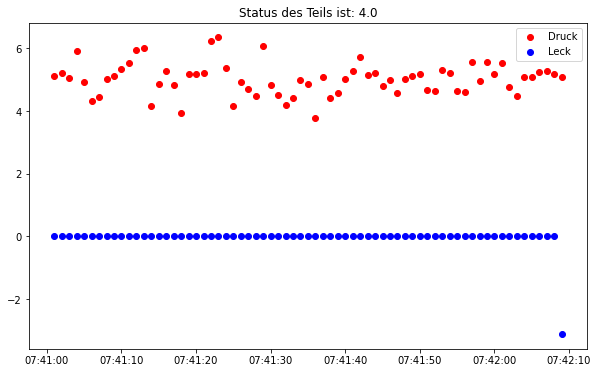

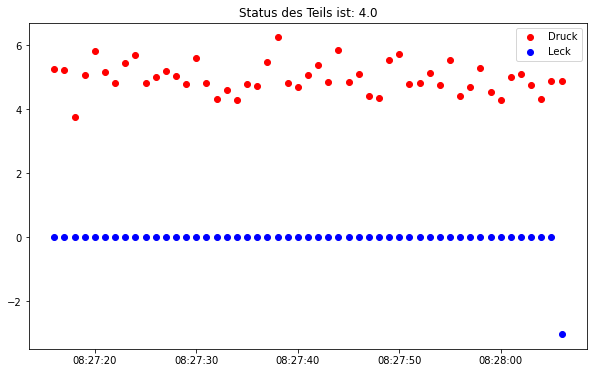

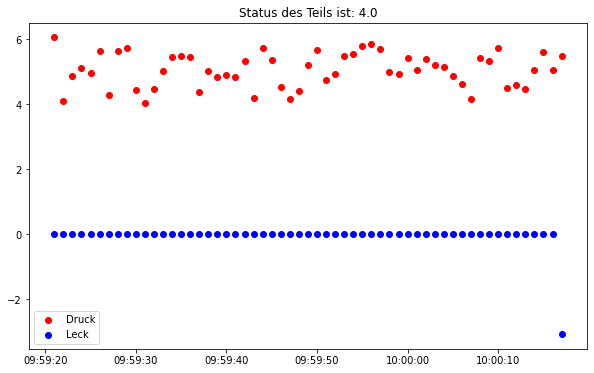

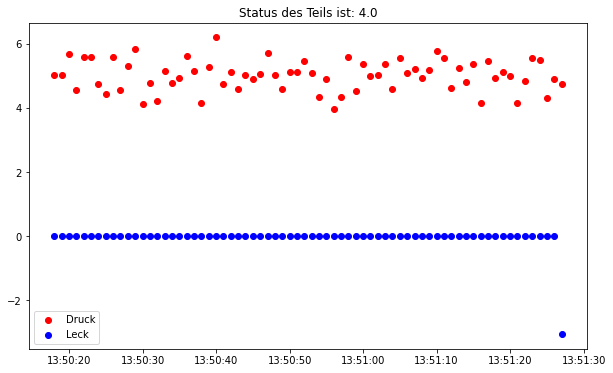

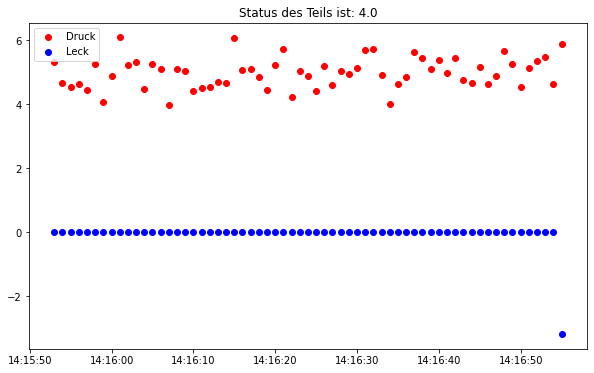

KeyboardInterrupt: 

In [7]:
for t in time_series:
    if t.status[0] == 3 and t.status[len(t)-1] == 4:
        fig, ax = plt.subplots(figsize=(10,6))
        ax.scatter(t.date, t.druck, color='red', label='Druck')
        ax.scatter(t.date, t.leck, color='blue', label='Leck')
        ax.set_title(f"Status des Teils ist: {t.status[len(t)-1]}")
        plt.legend()
        plt.show()
        fig.clear()